In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from sklearn.feature_selection import RFECV
from sklearn.metrics import cohen_kappa_score, make_scorer

In [9]:

def remove_small_classes(df, min):
    uniques = df.cwrb_reference_soil_group.unique()
    for u in uniques:
        cnt = df[df.cwrb_reference_soil_group == u].shape[0]
        if cnt < min:
            df = df[df.cwrb_reference_soil_group != u]
            print('Deleting {} with {} occurrences'.format(u, cnt))

    return df

def get_data(inputfile = '../data/test/mexico_k_1_layers_5.csv'):
    profile_file = '../data/profiles.csv'
    profiles_file = pd.read_csv(profile_file)
    profiles_file = profiles_file[['profile_id', 'cwrb_reference_soil_group']]
    data = pd.read_csv(inputfile)
    data = profiles_file.merge(data, how="inner", left_on=[
        'profile_id'], right_on=['profile_id'])
    
    data = remove_small_classes(data, 15)

    y = data.cwrb_reference_soil_group.astype(str)
    X = data.drop(['profile_id', 'cwrb_reference_soil_group'], axis=1)
    return X, y


# Layers 5

In [10]:
X, y = get_data()


# Create the RFE object and compute a cross-validated score.
clf = RandomForestClassifier(min_samples_split=6,
                                 n_estimators=1300, min_samples_leaf=2, oob_score=True, class_weight="balanced", n_jobs=-1)

# The "accuracy" scoring is proportional to the number of correct classifications
rfecv = RFECV(estimator=clf, step=1, cv=3,
              scoring=make_scorer(cohen_kappa_score), verbose=2)
rfecv.fit(X, y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

for i, rank in enumerate(rfecv.ranking_): 
    if rank!= 1:
        print(X.columns[i])

Fitting estimator with 56 features.
Fitting estimator with 55 features.
Fitting estimator with 54 features.
Fitting estimator with 53 features.
Fitting estimator with 52 features.


KeyboardInterrupt: 

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, stratify=y)


X_train_rfe = X_train.drop(['upper_depth','tceq_value_avg','tceq_value_avg_1','tceq_value_avg_3',
                             'orgc_value_avg_3','tceq_value_avg_4','n_layers'], axis=1)
X_test_rfe = X_test.drop(['upper_depth','tceq_value_avg','tceq_value_avg_1','tceq_value_avg_3',
                             'orgc_value_avg_3','tceq_value_avg_4','n_layers'], axis=1)



In [15]:
res = cross_val_score(clf, X_train, y_train, cv=10, scoring=make_scorer(
        cohen_kappa_score))
print(f'results: {res},avg = {np.average(res)} ')

results: [0.47149256 0.49112099 0.47619982 0.4756442  0.44050358 0.47573204
 0.48972253 0.49242498 0.49144561 0.48382391],avg = 0.4788110208313775 


In [56]:
res = cross_val_score(clf, X_train_rfe, y_train, cv=10, scoring=make_scorer(
        cohen_kappa_score))
print(f'results: {res},avg = {np.average(res)} ')

results: [0.48327921 0.51129387 0.4691101  0.51456675 0.47564293 0.46798189
 0.4688035  0.47572296 0.48515191 0.46883143],avg = 0.48203845449525423 


# Standard

Deleting Plinthosols with 6 occurrences
Deleting Histosols with 10 occurrences
Fitting estimator with 67 features.
Fitting estimator with 66 features.
Fitting estimator with 65 features.
Fitting estimator with 64 features.
Fitting estimator with 63 features.
Fitting estimator with 62 features.
Fitting estimator with 61 features.
Fitting estimator with 60 features.
Fitting estimator with 59 features.
Fitting estimator with 58 features.
Fitting estimator with 57 features.
Fitting estimator with 56 features.
Fitting estimator with 55 features.
Fitting estimator with 54 features.
Fitting estimator with 53 features.
Fitting estimator with 52 features.
Fitting estimator with 51 features.
Fitting estimator with 50 features.
Fitting estimator with 49 features.
Fitting estimator with 48 features.
Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator wit

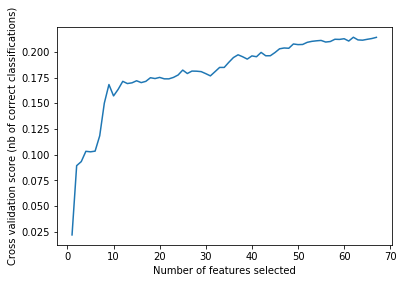

upper_depth
upper_depth_5
tceq_value_avg_5
upper_depth_15
tceq_value_avg_15


In [58]:
X, y = get_data('../data/test/mexico_k_1_standard_most_present.csv')


# Create the RFE object and compute a cross-validated score.
clf = RandomForestClassifier(min_samples_split=6,
                                 n_estimators=1300, min_samples_leaf=2, oob_score=True, class_weight="balanced", n_jobs=-1)

# The "accuracy" scoring is proportional to the number of correct classifications
rfecv = RFECV(estimator=clf, step=1, cv=3,
              scoring=make_scorer(cohen_kappa_score), verbose=2)
rfecv.fit(X, y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

for i, rank in enumerate(rfecv.ranking_): 
    if rank!= 1:
        print(X.columns[i])

In [60]:
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, stratify=y)


X_train_rfe = X_train.drop(['upper_depth','upper_depth_5','tceq_value_avg_5','upper_depth_15',
                             'tceq_value_avg_15'], axis=1)


In [61]:
res = cross_val_score(clf, X_train, y_train, cv=10, scoring=make_scorer(
        cohen_kappa_score))
print(f'results: {res},avg = {np.average(res)} ')

results: [0.52289026 0.51728076 0.50893465 0.47552603 0.49302366 0.52200803
 0.4979842  0.49976774 0.46137281 0.49991154],avg = 0.49986996935193784 


In [62]:
res = cross_val_score(clf, X_train_rfe, y_train, cv=10, scoring=make_scorer(
        cohen_kappa_score))
print(f'results: {res},avg = {np.average(res)} ')

results: [0.53459188 0.52900482 0.50736235 0.49032465 0.48672728 0.51766122
 0.50196245 0.50601869 0.46563471 0.50207746],avg = 0.5041365499038959 
